# ECS529U Algorithms and Data Structures
# Lab sheet 7

This lab gets you to work with binary trees and binary search trees in particular.

**Marks (max 5):**  Question 1: 1.5 | Questions 2-4: 1 each | Question 5: 0.5

## Question 1

This question is about understanding binary search trees (BSTs).

a) Draw the binary search tree we obtain if we start from the empty tree and add 
consecutively the numbers:

    21, 40, 3, 16, 39, 58, 21, 46, 1, 10

b) Write down the numbers of the tree you constructed, starting from the root using 
depth-first search, and using breadth-first search (and using pre-order)

c) Let `t` point to the root node of the BST you constructed in part a. Draw the BST that
results by applying each of the following operations:

    1. t.left = t.left.right
    2. t.left.right.right = t.left.right.left

In each of these cases, is the resulting structure a binary tree? Is it a binary search 
tree?

d) Starting each time from the tree you constructed in part a, perform the following removals (using the algorithm we saw in the lectures) and draw the resulting trees:

1. remove the node with value 16
2. remove the node with value 40

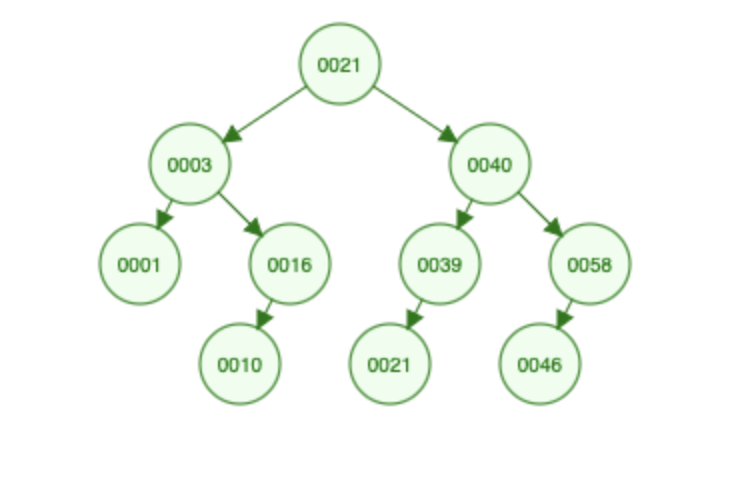

In [3]:
from IPython.display import Image
Image(filename='BST_q1.png') 


In [1]:
DFS: 21-3-1-16-10-40-39-21-58-46 = Pre-order
BFS: 21-3-40-1-16-39-58-10-21-46


SyntaxError: invalid syntax (1237315586.py, line 1)

In [ ]:
t = 21
t.left = 3
t.left.left = 1
t.left.right = 16
t.left.right.left = 10
t.right = 40
t.right.left = 39
t.right.left.left = 21
t.right.right = 58
t.right.right.left = 46




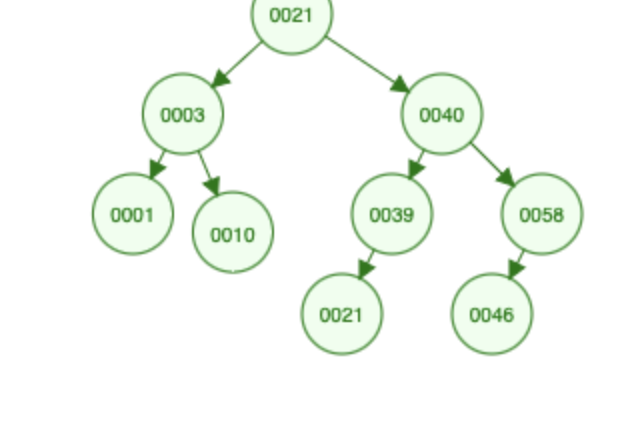

In [4]:
from IPython.display import Image
Image(filename='bst-1d.png') 





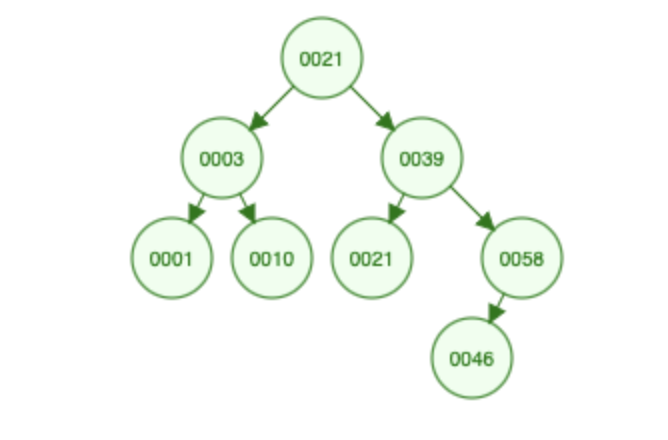

In [5]:
from IPython.display import Image
Image(filename='bst2-1d.png') 


 The rest of the Questions ask you to work with the `BST` class and variants thereof. To help you visualise trees, we have implemented the following "pretty printing" function for `BTNode` objects:

In [6]:
    def niceStr(self): # this goes in the BTNode class
        S = ["├","─","└","│"]
        angle = S[2]+S[1]+" "
        vdash = S[0]+S[1]+" "
        
        def niceRec(ptr,acc,pre):
            if ptr == None: return acc+pre+"None"
            if ptr.left==ptr.right==None: return acc+pre+str(ptr.data)
            if pre == vdash: pre2 = S[3]+"  "
            elif pre == angle: pre2 = "   "
            else: pre2 = ""
            left = niceRec(ptr.right,acc+pre2,vdash)
            right = niceRec(ptr.left,acc+pre2,angle)
            return acc+pre+str(ptr.data)+"\n"+left+"\n"+right
            
        return niceRec(self,"","")

For example, the following tree

        22
       /  \
      20   42
     / \   / \
    11 21 22 44

is converted into a string that prints as follows:

    22 
    ├─ 42
    │  ├─ 44
    │  └─ 22
    └─ 20
       ├─ 21
       └─ 11

## Question 2

Add in `BST` the following functions, assuming that we work with BSTs that store integers:

a) `def min(self)`

that returns the smallest element of the tree. If the tree is empty, the function should return `None`.

b) `def max(self)`

that returns the largest element of the tree. If the tree is empty, the function should return `None`.

c) `def removeAll(self, d)`

that removes all occurrences of the element `d` in the tree and returns the number of occurrences removed. For example, if the tree `t` is:

        22
       /  \
      20   42
     / \   / \
    11 21 22 44
    
then `t.removeAll(22)` should change `t` to:

        42
       /  \
      20   44
     / \  
    11 21 
    
and return `2`.

In [22]:
# 2a

    
    
    
    
   
       
        










class BTNode:
    def __init__(self,d,l,r):
        self.data = d
        self.left = l
        self.right = r
          
    def updateChild(self, oldChild, newChild):
        if self.left == oldChild:
            self.left = newChild
        elif self.right == oldChild:
            self.right = newChild
        else: raise Exception("updateChild error")

    # prints the node and all its children in a string
    def __str__(self): # this goes in the BTNode class
        S = ["├","─","└","│"]
        angle = S[2]+S[1]+" "
        vdash = S[0]+S[1]+" "
        
        def niceRec(ptr,acc,pre):
            if ptr == None: return acc+pre+"None"
            if ptr.left==ptr.right==None: return acc+pre+str(ptr.data)
            if pre == vdash: pre2 = S[3]+"  "
            elif pre == angle: pre2 = "   "
            else: pre2 = ""
            left = niceRec(ptr.right,acc+pre2,vdash)
            right = niceRec(ptr.left,acc+pre2,angle)
            return acc+pre+str(ptr.data)+"\n"+left+"\n"+right
            
        return niceRec(self,"","")


class BST:
    def __init__(self):
        self.root = None
        self.size = 0
        
    def __str__(self):
        return str(self.root)

    def search(self, d):   
        ptr = self.root
        while ptr != None:
            if d == ptr.data:
                return True
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        return False    
    
    def add(self, d):
        if self.root == None:
            self.root = BTNode(d,None,None)
        else:
            ptr = self.root
            while True:
                if d < ptr.data:
                    if ptr.left == None:
                        ptr.left = BTNode(d,None,None)
                        break
                    ptr = ptr.left
                else:
                    if ptr.right == None:
                        ptr.right = BTNode(d,None,None)
                        break
                    ptr = ptr.right
        self.size += 1
    
    def count(self, d):
        ptr = self.root
        count = 0
        while ptr != None:
            ptr = self._searchNode(ptr,d)
            if ptr != None:
                count += 1
                ptr = ptr.right
        return count

    def _searchNode(self, ptr, d):
        while ptr != None:
            if d == ptr.data:
                return ptr
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        return None

    def remove(self,d):
        if self.root == None: return
        if self.root.data == d: 
            self.size -= 1
            return self._removeRoot()
        parentPtr = None
        ptr = self.root
        while ptr != None and ptr.data != d:
            parentPtr = ptr                
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        if ptr != None:
            self.size -= 1
            self._removeNode(ptr,parentPtr)
            
    # removes the node ptr from the tree
    def _removeNode(self, ptr, parentPtr):
        # there are 3 cases to consider:
        # 1. the node to be removed is a leaf (no children)
        if ptr.left == ptr.right == None:
            parentPtr.updateChild(ptr,None)
        # 2. the node to be removed has exactly one child            
        elif ptr.left == None:
            parentPtr.updateChild(ptr,ptr.right)
        elif ptr.right == None:
            parentPtr.updateChild(ptr,ptr.left)
        # 3. the node to be removed has both children
        else:
            # find the min node at the right of ptr -- and its parent
            parentMinRNode = ptr
            minRNode = ptr.right
            while minRNode.left != None:
                parentMinRNode = minRNode
                minRNode = minRNode.left
            # replace the data of ptr with that of the min node
            ptr.data = minRNode.data
            # bypass the min node
            parentMinRNode.updateChild(minRNode,minRNode.right)
        
    def _removeRoot(self):
        # this is essentially a hack: we are adding a dummy node at 
        # the root and call the previous method -- it allows us to
        # re-use code
        parentRoot = BTNode(None,self.root,None)
        self._removeNode(self.root,parentRoot)
        self.root = parentRoot.left
        
    
    
    
    def min(self):
        if self.root is None:
            return None
        
        ptr = self.root
        
        while ptr.left is not None:
            ptr = ptr.left
            
        return ptr.data
    
    def max(self):
        if self.root is None:
            return None
        
        ptr = self.root
        
        while ptr.right is not None:
            ptr = ptr.right
            
        return ptr.data
    
    def removeAll(self,d):
        if self.root is None:
            return None
        
        counter = self.count(d)
        ptr = self
        for _ in range(counter):
            ptr.remove(d)
            
    
        return counter



print("Question 2")
t = BST()
print(t)
print("MAX MIN NOW")
print(t.min(),t.max())

print("end")
A = [22,20,11,21,42,22,44,1]
for x in A: t.add(x)
print(t)
print("MAX MIN NOW")
print(t.min(),t.max())
print("end")
t.removeAll(22)
print(t)



    












Question 2
None
MAX MIN NOW
None None
end
22
├─ 42
│  ├─ 44
│  └─ 22
└─ 20
   ├─ 21
   └─ 11
      ├─ None
      └─ 1
MAX MIN NOW
1 44
end
42
├─ 44
└─ 20
   ├─ 21
   └─ 11
      ├─ None
      └─ 1


## Question 3

Add in `BST` the following functions, assuming that we work with BSTs that store integers:

a) `def _sumAllRec(self, ptr)`

that <u>uses recursion</u> and returns the sum of all the elements of the subtree starting from the node `ptr`.

_Hint:_ you can simply use depth-first search, and ignoring the fact that this is a BST 
rather than a simple binary tree.

b) `def sumAll(self)`

that sums all the elements of the tree (use the function from part a).

c) `def sumAllBFS(self)`

that sums all the elements of the tree using breadth-first search.

_Hint:_ you can adapt the code for breadth-first search that we saw in the lecture 
(week 6). You will need to use a queue (see lecture of week 5).

In [34]:
from collections import deque
class BTNode:
    def __init__(self,d,l,r):
        self.data = d
        self.left = l
        self.right = r
          
    def updateChild(self, oldChild, newChild):
        if self.left == oldChild:
            self.left = newChild
        elif self.right == oldChild:
            self.right = newChild
        else: raise Exception("updateChild error")

    # prints the node and all its children in a string
    def __str__(self): # this goes in the BTNode class
        S = ["├","─","└","│"]
        angle = S[2]+S[1]+" "
        vdash = S[0]+S[1]+" "
        
        def niceRec(ptr,acc,pre):
            if ptr == None: return acc+pre+"None"
            if ptr.left==ptr.right==None: return acc+pre+str(ptr.data)
            if pre == vdash: pre2 = S[3]+"  "
            elif pre == angle: pre2 = "   "
            else: pre2 = ""
            left = niceRec(ptr.right,acc+pre2,vdash)
            right = niceRec(ptr.left,acc+pre2,angle)
            return acc+pre+str(ptr.data)+"\n"+left+"\n"+right
            
        return niceRec(self,"","")
    
class BST:
    def __init__(self):
        self.root = None
        self.size = 0
        
    def __str__(self):
        return str(self.root)

    def search(self, d):   
        ptr = self.root
        while ptr != None:
            if d == ptr.data:
                return True
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        return False    
    
    def add(self, d):
        if self.root == None:
            self.root = BTNode(d,None,None)
        else:
            ptr = self.root
            while True:
                if d < ptr.data:
                    if ptr.left == None:
                        ptr.left = BTNode(d,None,None)
                        break
                    ptr = ptr.left
                else:
                    if ptr.right == None:
                        ptr.right = BTNode(d,None,None)
                        break
                    ptr = ptr.right
        self.size += 1
    
    def count(self, d):
        ptr = self.root
        count = 0
        while ptr != None:
            ptr = self._searchNode(ptr,d)
            if ptr != None:
                count += 1
                ptr = ptr.right
        return count

    def _searchNode(self, ptr, d):
        while ptr != None:
            if d == ptr.data:
                return ptr
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        return None

    def remove(self,d):
        if self.root == None: return
        if self.root.data == d: 
            self.size -= 1
            return self._removeRoot()
        parentPtr = None
        ptr = self.root
        while ptr != None and ptr.data != d:
            parentPtr = ptr                
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        if ptr != None:
            self.size -= 1
            self._removeNode(ptr,parentPtr)
            
    # removes the node ptr from the tree
    def _removeNode(self, ptr, parentPtr):
        # there are 3 cases to consider:
        # 1. the node to be removed is a leaf (no children)
        if ptr.left == ptr.right == None:
            parentPtr.updateChild(ptr,None)
        # 2. the node to be removed has exactly one child            
        elif ptr.left == None:
            parentPtr.updateChild(ptr,ptr.right)
        elif ptr.right == None:
            parentPtr.updateChild(ptr,ptr.left)
        # 3. the node to be removed has both children
        else:
            # find the min node at the right of ptr -- and its parent
            parentMinRNode = ptr
            minRNode = ptr.right
            while minRNode.left != None:
                parentMinRNode = minRNode
                minRNode = minRNode.left
            # replace the data of ptr with that of the min node
            ptr.data = minRNode.data
            # bypass the min node
            parentMinRNode.updateChild(minRNode,minRNode.right)
        
    def _removeRoot(self):
        # this is essentially a hack: we are adding a dummy node at 
        # the root and call the previous method -- it allows us to
        # re-use code
        parentRoot = BTNode(None,self.root,None)
        self._removeNode(self.root,parentRoot)
        self.root = parentRoot.left
        
    
    
    
    def min(self):
        if self.root is None:
            return None
        
        ptr = self.root
        
        while ptr.left is not None:
            ptr = ptr.left
            
        return ptr.data
    
    def max(self):
        if self.root is None:
            return None
        
        ptr = self.root
        
        while ptr.right is not None:
            ptr = ptr.right
            
        return ptr.data
    
    def removeAll(self,d):
        if self.root is None:
            return None
        
        counter = self.count(d)
        ptr = self
        for _ in range(counter):
            ptr.remove(d)
            
    
        return counter
    def _sumAllRect(self,ptr):
        if ptr is None:
            return 0
        
        left_side = self._sumAllRect(ptr.left)
        right_side = self._sumAllRect(ptr.right)
        
        return ptr.data + left_side + right_side
    
    def sumAll(self):
        return self._sumAllRect(self.root)
    
    def sumAllBFS(self):
        if self.root is None:
            return 0

        sum = 0
        queue = [self.root]

        while queue:
            node = queue.pop(0)
            if node is not None:
                sum += node.data

                if node.left:
                    queue.append(node.left)

                if node.right:
                    queue.append(node.right)

        return sum
            
            
    
        
        
    

print("\nQuestion 3")
t = BST()
print(t)
print(t.sumAll(), t.sumAllBFS())
A = [22,20,11,21,42,22,44]
for x in A: t.add(x)
print(t)
print(t.sumAll(), t.sumAllBFS())



Question 3
None
0 0
22
├─ 42
│  ├─ 44
│  └─ 22
└─ 20
   ├─ 21
   └─ 11
182 182


## Question 4

Add in `BST` a function 

    def toSortedArray(self)

that returns an array containing the elements of the tree in ascending order.

_Hint:_ Use a helper function to do an inorder traversal of the BST.

In [5]:
from collections import deque
class BTNode:
    def __init__(self,d,l,r):
        self.data = d
        self.left = l
        self.right = r
          
    def updateChild(self, oldChild, newChild):
        if self.left == oldChild:
            self.left = newChild
        elif self.right == oldChild:
            self.right = newChild
        else: raise Exception("updateChild error")

    # prints the node and all its children in a string
    def __str__(self): # this goes in the BTNode class
        S = ["├","─","└","│"]
        angle = S[2]+S[1]+" "
        vdash = S[0]+S[1]+" "
        
        def niceRec(ptr,acc,pre):
            if ptr == None: return acc+pre+"None"
            if ptr.left==ptr.right==None: return acc+pre+str(ptr.data)
            if pre == vdash: pre2 = S[3]+"  "
            elif pre == angle: pre2 = "   "
            else: pre2 = ""
            left = niceRec(ptr.right,acc+pre2,vdash)
            right = niceRec(ptr.left,acc+pre2,angle)
            return acc+pre+str(ptr.data)+"\n"+left+"\n"+right
            
        return niceRec(self,"","")
    
class BST:
    def __init__(self):
        self.root = None
        self.size = 0
        
    def __str__(self):
        return str(self.root)

    def search(self, d):   
        ptr = self.root
        while ptr != None:
            if d == ptr.data:
                return True
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        return False    
    
    def add(self, d):
        if self.root == None:
            self.root = BTNode(d,None,None)
        else:
            ptr = self.root
            while True:
                if d < ptr.data:
                    if ptr.left == None:
                        ptr.left = BTNode(d,None,None)
                        break
                    ptr = ptr.left
                else:
                    if ptr.right == None:
                        ptr.right = BTNode(d,None,None)
                        break
                    ptr = ptr.right
        self.size += 1
    
    def count(self, d):
        ptr = self.root
        count = 0
        while ptr != None:
            ptr = self._searchNode(ptr,d)
            if ptr != None:
                count += 1
                ptr = ptr.right
        return count

    def _searchNode(self, ptr, d):
        while ptr != None:
            if d == ptr.data:
                return ptr
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        return None

    def remove(self,d):
        if self.root == None: return
        if self.root.data == d: 
            self.size -= 1
            return self._removeRoot()
        parentPtr = None
        ptr = self.root
        while ptr != None and ptr.data != d:
            parentPtr = ptr                
            if d < ptr.data:
                ptr = ptr.left
            else:
                ptr = ptr.right
        if ptr != None:
            self.size -= 1
            self._removeNode(ptr,parentPtr)
            
    # removes the node ptr from the tree
    def _removeNode(self, ptr, parentPtr):
        # there are 3 cases to consider:
        # 1. the node to be removed is a leaf (no children)
        if ptr.left == ptr.right == None:
            parentPtr.updateChild(ptr,None)
        # 2. the node to be removed has exactly one child            
        elif ptr.left == None:
            parentPtr.updateChild(ptr,ptr.right)
        elif ptr.right == None:
            parentPtr.updateChild(ptr,ptr.left)
        # 3. the node to be removed has both children
        else:
            # find the min node at the right of ptr -- and its parent
            parentMinRNode = ptr
            minRNode = ptr.right
            while minRNode.left != None:
                parentMinRNode = minRNode
                minRNode = minRNode.left
            # replace the data of ptr with that of the min node
            ptr.data = minRNode.data
            # bypass the min node
            parentMinRNode.updateChild(minRNode,minRNode.right)
        
    def _removeRoot(self):
        # this is essentially a hack: we are adding a dummy node at 
        # the root and call the previous method -- it allows us to
        # re-use code
        parentRoot = BTNode(None,self.root,None)
        self._removeNode(self.root,parentRoot)
        self.root = parentRoot.left
        
    
    
    
    def min(self):
        if self.root is None:
            return None
        
        ptr = self.root
        
        while ptr.left is not None:
            ptr = ptr.left
            
        return ptr.data
    
    def max(self):
        if self.root is None:
            return None
        
        ptr = self.root
        
        while ptr.right is not None:
            ptr = ptr.right
            
        return ptr.data
    
    def removeAll(self,d):
        if self.root is None:
            return None
        
        counter = self.count(d)
        ptr = self
        for _ in range(counter):
            ptr.remove(d)
            
    
        return counter
    def _sumAllRect(self,ptr):
        if ptr is None:
            return 0
        
        left_side = self._sumAllRect(ptr.left)
        right_side = self._sumAllRect(ptr.right)
        
        return ptr.data + left_side + right_side
    
    def sumAll(self):
        return self._sumAllRect(self.root)
    
    def sumAllBFS(self):
        if self.root is None:
            return 0

        sum = 0
        queue = [self.root]

        while queue:
            node = queue.pop(0)
            if node is not None:
                sum += node.data

                if node.left:
                    queue.append(node.left)

                if node.right:
                    queue.append(node.right)

        return sum
    def toSortedArray(self):
        def traverseAux(node,result):
            if node is not None:
                traverseAux(node.left,result)
                result.append(node.data)
                traverseAux(node.right,result)
        
        sorted = []
        
        traverseAux(self.root,sorted)
        return sorted
        
        
        
print("Question 2")
t = BST()
print(t)
print(t.min(),t.max())
A = [22,20,11,21,42,22,44,1]
for x in A: t.add(x)
print(t)
print(t.min(),t.max())
t.removeAll(22)
print(t)

print("\nQuestion 3")
t = BST()
print(t)
print(t.sumAll(), t.sumAllBFS())
A = [22,20,11,21,42,22,44]
for x in A: t.add(x)
print(t)
print(t.sumAll(), t.sumAllBFS())

print("\nQuestion 4")
print(BST().toSortedArray())
print(t.toSortedArray())
        
        
    



Question 2
None
None None
22
├─ 42
│  ├─ 44
│  └─ 22
└─ 20
   ├─ 21
   └─ 11
      ├─ None
      └─ 1
1 44
42
├─ 44
└─ 20
   ├─ 21
   └─ 11
      ├─ None
      └─ 1

Question 3
None
0 0
22
├─ 42
│  ├─ 44
│  └─ 22
└─ 20
   ├─ 21
   └─ 11
182 182

Question 4
[]
[11, 20, 21, 22, 22, 42, 44]


In [ ]:
# Minimal testing Questions 2-4

print("Question 2")
t = BST()
print(t)
print(t.min(),t.max())
A = [22,20,11,21,42,22,44,1]
for x in A: t.add(x)
print(t)
print(t.min(),t.max())
t.removeAll(22)
print(t)

print("\nQuestion 3")
t = BST()
print(t)
print(t.sumAll(), t.sumAllBFS())
A = [22,20,11,21,42,22,44]
for x in A: t.add(x)
print(t)
print(t.sumAll(), t.sumAllBFS())

print("\nQuestion 4")
print(BST().toSortedArray())
print(t.toSortedArray())

## Question 5

You are asked to write a class `BST2` which implements a BST in which each node has a multiplicity counter (`mult`), which counts how many times the node's value is stored in the tree. This way, there is no need to store duplicate nodes in the tree: 
- adding a value that already exists in the tree simply amounts to increase the counter of the value's node by 1; 
- removing a value from the tree amounts to reducing the counter of its node by 1, and if the counter becomes 0 then the node is removed altogether.

Below we have provided you with a class of nodes `BTNode2` to use, and we made a start in implementing `BST2`.You are asked to implement the following functions:

- `add(self,d)` for adding the value `d` in the BST2. This should use BST 
search and either increase the `mult` counter of the `BTNode2` containing `d` or, if `d` is not in the tree, create a new `BTNode2` for `d`.

- `search(self,d)` for searching the value `d` in the BST2. This should use BST 
search and return `True` if the value is found, and `False` otherwise.

- `count(self,d)` for counting the times the value `d` appears in the BST2. This 
should use BST search and return the number of times that the value appears in 
the BST2.

- `remove(self,d)` for removing one occurrence of the value `d` from the BST2.

In [6]:
class BTNode2:
    def __init__(self, d, l, r):
        self.data = d
        self.left = l
        self.right = r
        self.mult = 1

    def __str__(self):
        st = str(self.data) + " (" + str(self.mult) + ") -> ["
        if self.left is not None:
            st += str(self.left)
        else:
            st += "None"
        if self.right is not None:
            st += ", " + str(self.right)
        else:
            st += ", None"
        return st + "]"


class BST2:
    def __init__(self):
        self.root = None

    def add(self, d):
        if self.root is None:
            self.root = BTNode2(d, None, None)
        else:
            self._add(self.root, d)

    def _add(self, node, d):
        if d == node.data:
            node.mult += 1
        elif d < node.data:
            if node.left is None:
                node.left = BTNode2(d, None, None)
            else:
                self._add(node.left, d)
        else:
            if node.right is None:
                node.right = BTNode2(d, None, None)
            else:
                self._add(node.right, d)

    def search(self, d):
        return self._search(self.root, d)

    def _search(self, node, d):
        if node is None:
            return False
        if d == node.data:
            return True
        elif d < node.data:
            return self._search(node.left, d)
        else:
            return self._search(node.right, d)

    def count(self, d):
        return self._count(self.root, d)

    def _count(self, node, d):
        if node is None:
            return 0
        if d == node.data:
            return node.mult
        elif d < node.data:
            return self._count(node.left, d)
        else:
            return self._count(node.right, d)

    def remove(self, d):
        self.root = self._remove(self.root, d)

    def _remove(self, node, d):
        if node is None:
            return None

        if d == node.data:
            if node.mult > 1:
                node.mult -= 1
            else:
                if node.left is None:
                    return node.right
                elif node.right is None:
                    return node.left
                else:
                    min_val = self._find_min(node.right)
                    node.data = min_val.data
                    node.mult = min_val.mult
                    node.right = self._remove(node.right, min_val.data)
        elif d < node.data:
            node.left = self._remove(node.left, d)
        else:
            node.right = self._remove(node.right, d)

        return node

    def _find_min(self, node):
        while node.left is not None:
            node = node.left
        return node

    def __str__(self):
        return str(self.root)
        
print("Question 5")
t = BST2()
A = [22,20,11,21,42,11,22,44,1]
for x in A: t.add(x)
print(t)
for x in A:
    print(x,t.search(x),t.count(x),t.search(-x),t.count(-x))
for x in A:
    t.remove(x); print("take",x,":\n",t)

Question 5
22 (2) -> [20 (1) -> [11 (2) -> [1 (1) -> [None, None], None], 21 (1) -> [None, None]], 42 (1) -> [None, 44 (1) -> [None, None]]]
22 True 2 False 0
20 True 1 False 0
11 True 2 False 0
21 True 1 False 0
42 True 1 False 0
11 True 2 False 0
22 True 2 False 0
44 True 1 False 0
1 True 1 False 0
take 22 :
 22 (1) -> [20 (1) -> [11 (2) -> [1 (1) -> [None, None], None], 21 (1) -> [None, None]], 42 (1) -> [None, 44 (1) -> [None, None]]]
take 20 :
 22 (1) -> [21 (1) -> [11 (2) -> [1 (1) -> [None, None], None], None], 42 (1) -> [None, 44 (1) -> [None, None]]]
take 11 :
 22 (1) -> [21 (1) -> [11 (1) -> [1 (1) -> [None, None], None], None], 42 (1) -> [None, 44 (1) -> [None, None]]]
take 21 :
 22 (1) -> [11 (1) -> [1 (1) -> [None, None], None], 42 (1) -> [None, 44 (1) -> [None, None]]]
take 42 :
 22 (1) -> [11 (1) -> [1 (1) -> [None, None], None], 44 (1) -> [None, None]]
take 11 :
 22 (1) -> [1 (1) -> [None, None], 44 (1) -> [None, None]]
take 22 :
 44 (1) -> [1 (1) -> [None, None], None]